In [63]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income/adult.csv


In [64]:
census_income = pd.read_csv('/kaggle/input/adult-census-income/adult.csv')
census_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [65]:
#Finding all duplicates in the Census Income Dataset 
duplicates = census_income.duplicated()
census_income[duplicates]

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
8453,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
8645,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
12202,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
14346,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
15603,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
17344,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
19067,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
20388,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
20507,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
22783,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [66]:
print('Shape before dropping duplicates: ',census_income.shape)
census_income1 = census_income.drop_duplicates()
print('Shape after dropping duplicates: ',census_income1.shape)

#Duplicates Dropped number of Rows
dropped_rows = census_income.shape[0] - census_income1.shape[0]
print('Number of rows dropped: ', dropped_rows)

census_income = census_income1

Shape before dropping duplicates:  (32561, 15)
Shape after dropping duplicates:  (32537, 15)
Number of rows dropped:  24


In [67]:
census_income.isin([' ?', '?', '? ']).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [68]:
import math
census_income = census_income.replace([' ?', '?', '? '], np.nan)

total_na = census_income.isnull().sum().sum()
total_cells = np.product(census_income.size)
percentage_missing = total_na/total_cells*100

print('Total number of missing values in the dataset: ', total_na)
print('Percentage of missing values in the dataset: ', math.ceil(percentage_missing),'%') 

Total number of missing values in the dataset:  4261
Percentage of missing values in the dataset:  1 %


In [69]:
census_income.head()
df = census_income

In [70]:
df['workclass'] = df['workclass'].fillna(df['workclass'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['native.country'] = df['native.country'].fillna(df['native.country'].mode()[0])
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

Text(0, 0.5, 'Count')

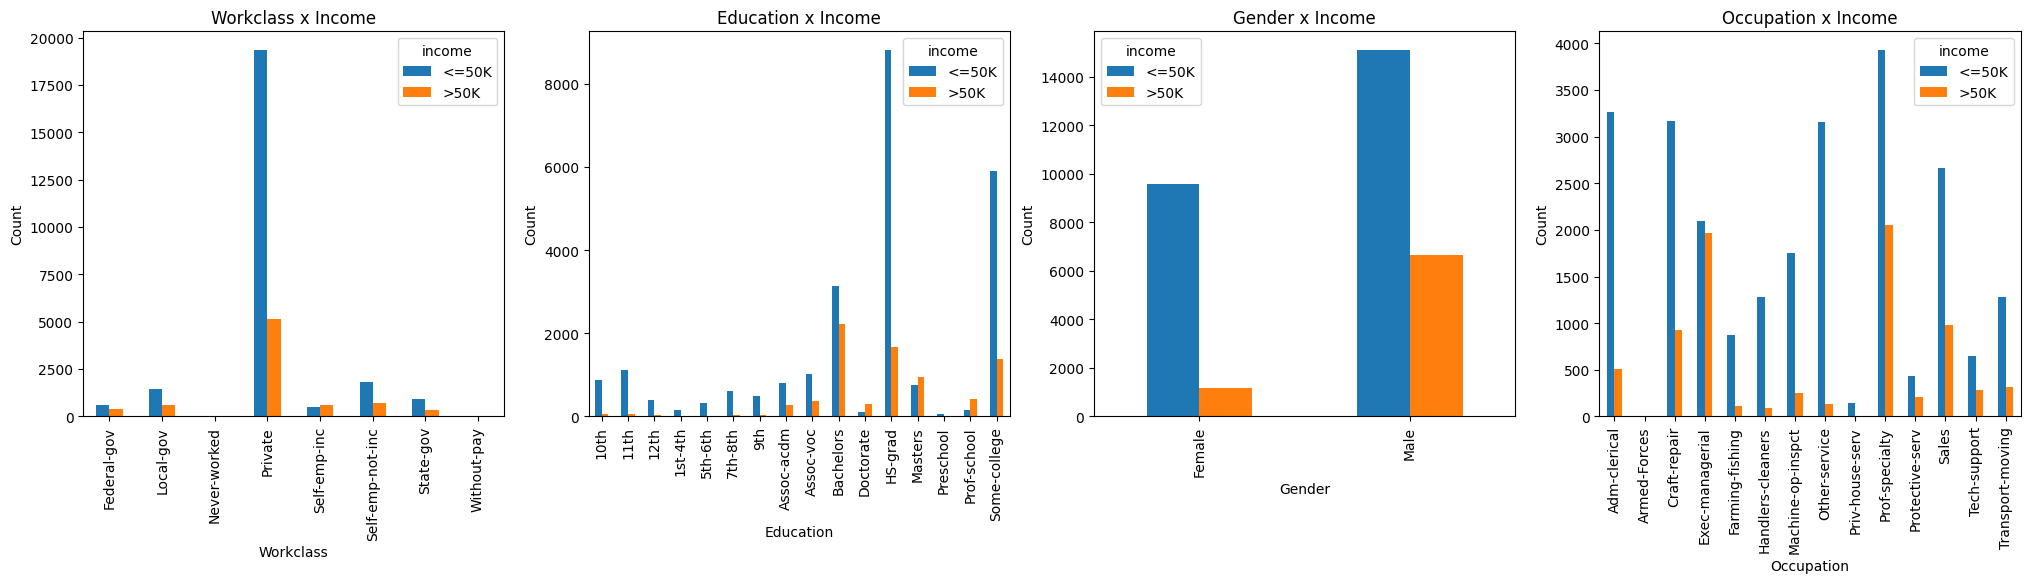

In [71]:
# plotting Workclass, education, gender vs income 

fig, axes = plt.subplots(1, 4, figsize=(25,5))

workclass_x_income = pd.crosstab(df['workclass'],df['income'],).plot(kind='bar',ax=axes[0])
axes[0].set_title('Workclass x Income')
axes[0].set_xlabel('Workclass')
axes[0].set_ylabel('Count')

education_x_income = pd.crosstab(df['education'], df['income']).plot(kind='bar',ax=axes[1])
axes[1].set_title('Education x Income')
axes[1].set_xlabel('Education')
axes[1].set_ylabel('Count')

gender_x_income = pd.crosstab(df['sex'], df['income']).plot(kind='bar', ax=axes[2])
axes[2].set_title('Gender x Income')
axes[2].set_xlabel('Gender')
axes[2].set_ylabel('Count')


occupation_x_income = pd.crosstab(df['occupation'],df['income'],).plot(kind='bar', ax= axes[3])
axes[3].set_title('Occupation x Income')
axes[3].set_xlabel('Occupation')
axes[3].set_ylabel('Count')


In [72]:
# Feature Scaling/Handling 

income_map = {'<=50K': 0, '>50K': 1}
df['income'] = df['income'].map(income_map)

In [73]:
df['education'] = df['education.num']
df = df.drop(columns = ['education.num'])
df = df.drop(columns = ['fnlwgt'])

In [74]:
df['marital.status'].value_counts()

marital.status
Married-civ-spouse       14970
Never-married            10667
Divorced                  4441
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64

In [75]:
categorical = df.select_dtypes(include=['object']).columns.tolist()
numerical = df.select_dtypes(include=['int64']).columns.tolist()
print(categorical)
print(numerical)

['workclass', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']
['age', 'education', 'capital.gain', 'capital.loss', 'hours.per.week', 'income']


In [76]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [77]:
for column in categorical:
    df[column] = label_encoder.fit_transform(df[column])

df.head(10)

,age,workclass,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,3,9,6,9,1,4,0,0,4356,40,38,0
1,82,3,9,6,3,1,4,0,0,4356,18,38,0
2,66,3,10,6,9,4,2,0,0,4356,40,38,0
3,54,3,4,0,6,4,4,0,0,3900,40,38,0
4,41,3,10,5,9,3,4,0,0,3900,40,38,0
5,34,3,9,0,7,4,4,0,0,3770,45,38,0
6,38,3,6,5,0,4,4,1,0,3770,40,38,0
7,74,6,16,4,9,2,4,0,0,3683,20,38,1
8,68,0,9,0,9,1,4,0,0,3683,40,38,0
9,41,3,10,4,2,4,4,1,0,3004,60,38,1


## Random Forest From Scratch Implementation

In [78]:
import numpy as np

class Node:
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, gain=None, value=None):
        # For decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.gain = gain

        # For leaf node
        self.value = value

class DecisionTreeClassifier_custom:
    def __init__(self, minimum_sample_split=2, max_tree_depth=2, criterion='best'):
        # Initialize the root of the tree
        self.root = None

        # Stopping conditions
        self.minimum_sample_split = minimum_sample_split
        self.max_tree_depth = max_tree_depth
        self.criterion = criterion

    def fit(self, X, Y):
        # Combine X and Y into a single dataset
        dataset = np.concatenate((X, Y.reshape(-1, 1)), axis=1)
        self.root = self.build_decision_tree(dataset)

    def predict(self, X):
        # Make predictions for each sample
        return np.array([self.make_prediction(x, self.root) for x in X])

    def build_decision_tree(self, dataset, current_depth=0):
        X, Y = dataset[:, :-1], dataset[:, -1]
        num_samples, num_features = np.shape(X)

        # Split until stopping conditions are met
        if num_samples >= self.minimum_sample_split and current_depth <= self.max_tree_depth:
            best_split = self.get_best_split(dataset, num_samples, num_features)
            if best_split["gain"] > 0:
                left_subtree = self.build_decision_tree(best_split["dataset_left"], current_depth + 1)
                right_subtree = self.build_decision_tree(best_split["dataset_right"], current_depth + 1)
                return Node(best_split["feature_index"], best_split["threshold"], left_subtree, right_subtree, best_split["gain"])

        # Compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        return Node(value=leaf_value)

    def get_best_split(self, dataset, num_samples, num_features):
        best_split = {}
        max_gain = -float("inf")

        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)

            for threshold in possible_thresholds:
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                if len(dataset_left) > 0 and len(dataset_right) > 0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    current_gain = self.calculate_gain(y, left_y, right_y)

                    if current_gain > max_gain:
                        best_split = {
                            "feature_index": feature_index,
                            "threshold": threshold,
                            "dataset_left": dataset_left,
                            "dataset_right": dataset_right,
                            "gain": current_gain
                        }
                        max_gain = current_gain
        if "gain" in best_split:
          return best_split
        else:
          return {"gain": 0}               

    def calculate_gain(self, y, left_y, right_y):
        # Select gain calculation method based on criterion
        if self.criterion in ['gini', 'best']:
            gain = self.gini_gain(y, left_y, right_y)
            if self.criterion == 'gini':
                return gain

        if self.criterion in ['entropy', 'best']:
            entropy_gain = self.information_gain(y, left_y, right_y)
            if self.criterion == 'entropy':
                return entropy_gain

            # For criterion 'best', use the max of gini and entropy gains
            return max(gain, entropy_gain)

    def split(self, dataset, feature_index, threshold):
        # Split dataset based on feature and threshold
        left_indices = dataset[:, feature_index] <= threshold
        right_indices = dataset[:, feature_index] > threshold
        return dataset[left_indices], dataset[right_indices]

    def information_gain(self, parent, left_child, right_child):
        # Calculate information gain
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)
        return self.entropy(parent) - (weight_left * self.entropy(left_child) + weight_right * self.entropy(right_child))

    def gini_gain(self, parent, left_child, right_child):
        # Calculate Gini gain
        weight_left = len(left_child) / len(parent)
        weight_right = len(right_child) / len(parent)
        return self.gini_index(parent) - (weight_left * self.gini_index(left_child) + weight_right * self.gini_index(right_child))

    def entropy(self, y):
        # Calculate entropy
        classes = np.unique(y)
        entropy = 0
        for cls in classes:
            p = len(y[y == cls]) / len(y)
            entropy -= p * np.log2(p) if p > 0 else 0
        return entropy

    def gini_index(self, y):
        # Calculate Gini index
        classes = np.unique(y)
        gini = 1
        for cls in classes:
            p = len(y[y == cls]) / len(y)
            gini -= p**2
        return gini

    def calculate_leaf_value(self, Y):
        # Calculate the value for a leaf node (most common class)
        return np.bincount(Y.astype('int')).argmax()

    def make_prediction(self, x, tree):
        # Make a prediction for a single sample
        if tree.value is not None:
            return tree.value
        feature_val = x[tree.feature_index]
        if feature_val <= tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)


In [79]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

class RandomForestClassifier_custom:
    def __init__(self, n_trees=100, min_samples_split=2, max_depth=2, n_features=None, criterion='best'):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_features = n_features
        self.criterion = criterion
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeClassifier_custom(
                minimum_sample_split=self.min_samples_split,
                max_tree_depth=self.max_depth,
                criterion=self.criterion
            )
            # Bootstrap sample
            sample_X, sample_y = self.bootstrap_sample(X, y)
            tree.fit(sample_X, sample_y)
            self.trees.append(tree)

    def bootstrap_sample(self, X, y):
        n_samples = X.shape[0]
        indices = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[indices], y[indices]

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.swapaxes(tree_preds, 0, 1)
        # Majority vote
        y_pred = [np.bincount(tree_pred).argmax() for tree_pred in tree_preds]
        return np.array(y_pred)



In [80]:
# Assuming the RandomForestClassifier_custom class is already defined
from sklearn.model_selection import train_test_split

# Step 1: Your dataset should be already split as per the given shapes
X_rf = df.iloc[:, :-1].values
y_rf = df.iloc[:, -1].values.reshape(-1,1)



# Split the data into 70% train and 30% temporary
X_train_rf, X_temp_rf, y_train_rf, y_temp_rf = train_test_split(X_rf, y_rf, test_size=0.3, stratify=y_rf, random_state=42)
# Split the temporary data into 50% test and 50% validation
X_test_rf, X_val_rf, y_test_rf, y_val_rf = train_test_split(X_temp_rf, y_temp_rf, test_size=0.5, stratify=y_temp_rf, random_state=42)

print(f'X_train: {X_train_rf.shape}, X_test: {X_test_rf.shape}, X_val: {X_val_rf.shape}')
print(f'y_train: {y_train_rf.shape}, y_test: {y_test_rf.shape}, y_val: {y_val_rf.shape}')

# Step 2: Create an instance of the RandomForest
rf_classifier = RandomForestClassifier_custom(n_trees=4, max_depth=5, criterion='best')

# Step 3: Fit the model on the training data
rf_classifier.fit(X_train_rf, y_train_rf)

# Step 4: Make predictions on the test data
y_pred = rf_classifier.predict(X_test_rf)

# Step 5: Evaluate the model's performance (optional)
# For example, you can use accuracy_score from sklearn.metrics
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_rf, y_pred)
print(f"Accuracy: {accuracy}")


X_train: (22775, 12), X_test: (4881, 12), X_val: (4881, 12)
y_train: (22775, 1), y_test: (4881, 1), y_val: (4881, 1)
Accuracy: 0.8541282524072936


In [81]:
# Import Evaluation Metrics
from sklearn import metrics
from scipy.stats import randint
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score, confusion_matrix
from keras_tuner import RandomSearch, HyperParameters

# Calculate and print evaluation metrics
accuracy = accuracy_score(y_test_rf, y_pred)
precision = precision_score(y_test_rf, y_pred)#, average='weighted')
recall = recall_score(y_test_rf, y_pred)#, average='weighted')
f1 = f1_score(y_test_rf, y_pred)#, average='weighted')
confusion = confusion_matrix(y_test_rf, y_pred)
#roc_auc_rf = roc_auc_score(Y_test, dt_model.predict_proba(X_test)[:, 1])
#report = classification_report(y_test, Y_pred, target_names=X.target_names)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
#print("ROC-AUC: {:.4f}".format(roc_auc_rf))
print("\nConfusion Matrix:")
print(confusion)

Accuracy: 0.8541
Precision: 0.8005
Recall: 0.5255
F1-Score: 0.6345

Confusion Matrix:
[[3551  154]
 [ 558  618]]


In [82]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd

# X_val_dt and y_val_dt are validation datasets
X1_rf = X_val_rf
y1_rf = y_val_rf

# Initialize KFold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

# Lists to store metrics for each fold
accuracies = []
precisions = []
recalls = []
f1_scores = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(X1_rf ):
    X_train, X_test = X1_rf[train_index], X1_rf[test_index]
    y_train, y_test = y1_rf[train_index], y1_rf[test_index]

    # Initialize and fit your custom decision tree
    rf_model = RandomForestClassifier_custom(n_trees=4, max_depth=5, criterion='best')
    rf_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = rf_model.predict(X_test)

    # Calculate metrics
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))

# Calculate and print average metrics
avg_accuracy = np.mean(accuracies)
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1_score = np.mean(f1_scores)

print(f"Average Accuracy: {avg_accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1_score:.4f}")


Average Accuracy: 0.8455
Average Precision: 0.7956
Average Recall: 0.4849
Average F1-Score: 0.6021
